# Hello PyTorch 101 with Linear Regression Example

In [1]:
# Prerequisites
import numpy as np
import pandas as pd
import seaborn as sns

import torch
import torch.nn as nn 


### Get Dataset

In [2]:
data_file = 'data/cars.csv'
df_cars = pd.read_csv(data_file)
df_cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### Visualize Data

<Axes: xlabel='wt', ylabel='mpg'>

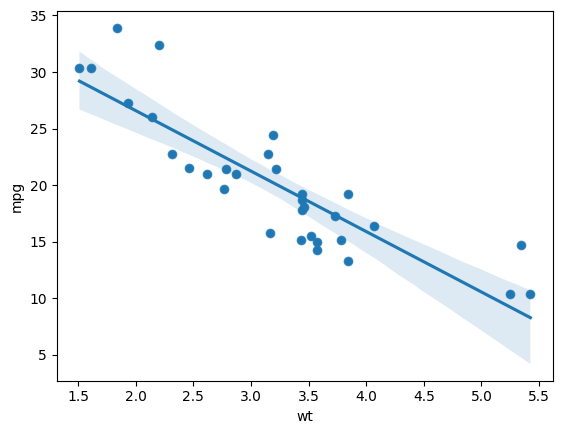

In [3]:
sns.scatterplot(x='wt', y='mpg', data=df_cars)
sns.regplot(x='wt', y='mpg', data=df_cars)

### Convert Data to Tensors

In [4]:
# Get independent variable (weight) as Numpy array
X_list = df_cars.wt.values
X_np = np.array(X_list, dtype=np.float32).reshape(-1, 1)
print("X_np shape:", X_np.shape)
print("X_np type:", type(X_np))
print(X_np[:5])


X_np shape: (32, 1)
X_np type: <class 'numpy.ndarray'>
[[2.62 ]
 [2.875]
 [2.32 ]
 [3.215]
 [3.44 ]]


In [5]:
# Convert X to torch tensor
X = torch.from_numpy(X_np)
print("X tensor shape:", X.shape)
print("X tensor type:", type(X))
print(X[:5])


X tensor shape: torch.Size([32, 1])
X tensor type: <class 'torch.Tensor'>
tensor([[2.6200],
        [2.8750],
        [2.3200],
        [3.2150],
        [3.4400]])


In [6]:
# Get dependent variable (miles per gallon) as list
y_list = df_cars.mpg.values
# Convert list to tensor
y = torch.tensor(y_list)
print("y tensor shape:", y.shape)
print("y tensor type:", type(y))
print(y[:5])

y tensor shape: torch.Size([32])
y tensor type: <class 'torch.Tensor'>
tensor([21.0000, 21.0000, 22.8000, 21.4000, 18.7000], dtype=torch.float64)


### Training Loop

In [7]:
# Weights and Biases
w = torch.randn(1, requires_grad=True, dtype=torch.float32)
b = torch.randn(1, requires_grad=True, dtype=torch.float32)

# number of epochs to train
nr_epochs = 1000
# learning rate
lr = 0.001

# Loop over the number of epochs
for epoch in range(nr_epochs):
    # Loop over samples
    for i in range(len(X)):
        # Forward pass: compute predicted y by passing x to the model
        y_pred = X[i] * w + b

        # Compute loss
        loss_tensor = torch.pow(y_pred - y[i],2)

        # Backward pass: compute gradient of the loss with respect to model parameters
        loss_tensor.backward()

        # Update weights using gradient descent; wrap in torch.no_grad() to avoid tracking in autograd
        with torch.no_grad():
            w -= w.grad * lr
            b -= b.grad * lr

            # Manually zero the gradients after updating weights
            w.grad.zero_()  # Underscore means in-place operation
            b.grad.zero_()  # Underscore means in-place operation
    if epoch % 100 == 0:
        print(f"epoch: {epoch}, loss: {loss_tensor.item():.4f}, w: {w.item():.4f}, b: {b.item():.4f}")

# Final parameters
print(f"Final parameters: w: {w.item():.4f}, b: {b.item():.4f}")


epoch: 0, loss: 207.7778, w: 2.4010, b: 0.5624
epoch: 100, loss: 11.9628, w: 1.0167, b: 15.1753
epoch: 200, loss: 3.0796, w: -1.4345, b: 23.6635
epoch: 300, loss: 0.5064, w: -2.9353, b: 28.8610
epoch: 400, loss: 0.0053, w: -3.8543, b: 32.0434
epoch: 500, loss: 0.1013, w: -4.4170, b: 33.9921
epoch: 600, loss: 0.3112, w: -4.7615, b: 35.1852
epoch: 700, loss: 0.4963, w: -4.9725, b: 35.9157
epoch: 800, loss: 0.6308, w: -5.1017, b: 36.3630
epoch: 900, loss: 0.7212, w: -5.1808, b: 36.6370
Final parameters: w: -5.2288, b: 36.8033


### Plot results

<Axes: >

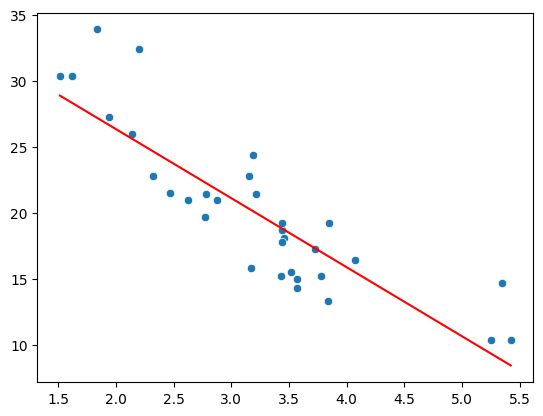

In [8]:
y_pred = ((X * w) + b).detach().numpy()
# %%
sns.scatterplot(x=X_list, y=y_list)
sns.lineplot(x=X_list, y=y_pred.reshape(-1), color='red')

### Compare Results to scikit-learn

In [9]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_np, y_list)
print(f"Slope: {reg.coef_}, Bias: {reg.intercept_}")

Slope: [-5.3444715], Bias: 37.285125732421875


### Visualize model

GraphViz can be installed from (https://graphviz.org/download/)

In [11]:
import os
import platform
from torchviz import make_dot

if platform.system() == "Windows":
    print("Running in Windows")
    os.environ['PATH'] += os.pathsep + 'C:/Program Files/Graphviz/bin'
    make_dot(loss_tensor)


Running in Windows
